<h1>2장 NumPy 소개</h1>

<h2>비교, 마스크, 부울 로직</h2>

<b>예제: 비온 날 세기</b>

In [3]:
import numpy as np
import pandas as pd
# Pandas를 이용해 인치 단위의 강수량 데이터를 Numpy 배열로 추출
rainfall = pd.read_csv('/Users/chosikc/Sites/PythonDataHandbook/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254 # 1/10mm -> inches 
inches.shape

(365,)

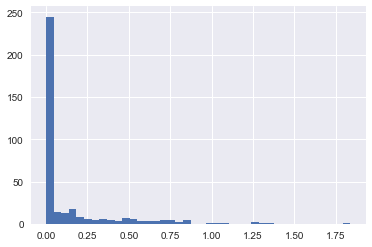

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() #플롯 형태 설정
plt.hist(inches, 40);

<b>세부 분석</b>

<b>ufunc으로서의 비교 연산자</b>

In [5]:
x = np.array([1,2,3,4,5])

In [6]:
x < 3 # 보다 작음

array([ True,  True, False, False, False])

In [7]:
x > 3 # 보다 큼

array([False, False, False,  True,  True])

In [8]:
x <= 3 # 보다 작거나 같음

array([ True,  True,  True, False, False])

In [9]:
x >= 3 # 보다 크거나 같음

array([False, False,  True,  True,  True])

In [10]:
x != 3 # 같지 않음

array([ True,  True, False,  True,  True])

In [11]:
(2 * x) == (x ** 2)

array([False,  True, False, False, False])

<table style="width:100%">
  <tr>
    <th>연산자</th>
    <th>대응 ufunc</th> 
  </tr>
  <tr>
    <td>==</td>
    <td>np.equal</td> 
  </tr>
  <tr>
    <td>!=</td>
    <td>np.not_equel</td> 
  </tr>
  <tr>
    <td><</td>
    <td>np.less</td> 
  </tr>
  <tr>
    <td><=</td>
    <td>np.less_equel</td> 
  </tr>
  <tr>
    <td>></td>
    <td>np.greater</td> 
  </tr>
  <tr>
    <td>>=</td>
    <td>np.greater_equel</td> 
  </tr>
</table>

In [12]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3,4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [13]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

<b>부울 배열로 작업하기</b>

In [14]:
print(x)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


In [15]:
x.shape

(3, 4)

<b>요소 개수 세기</b>

In [16]:
# 6보다 작은 값은 몇 개일까?
np.count_nonzero(x < 6)

8

In [17]:
np.sum(x<6)

8

In [18]:
# 각행에 6보다 작은 값이 몇 개일까?
np.sum(x < 6, axis = 1)

array([4, 2, 2])

In [19]:
# 8보다 큰 값이 하나라도 있는가?
np.any(x > 8)

True

In [20]:
# 0보다 작은 값이 하나라도 있는가?
np.any(x < 0)

False

In [21]:
# 모든 값이 10보다 작은가?
np.all(x < 10)

True

In [22]:
# 모든 값이 6과 같은가?
np.all(x == 6)

False

In [23]:
# 각 행의 모든 값이 8보다 작은가?
np.all(x < 8, axis = 1)

array([ True, False,  True])

<b>부울 연산자</b>

In [24]:
np.sum((inches > 0.5) & (inches < 1))

29

In [25]:
inches > (0.5 & inches) < 1

TypeError: ufunc 'bitwise_and' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [26]:
np.sum(~( (inches <= 0.5) | (inches >= 1)))

29

<table style="width:100%">
  <tr>
    <th>연산자</th>
    <th>대응 ufunc</th> 
  </tr>
  <tr>
    <td>&</td>
    <td>np.blwise_and</td> 
  </tr>
  <tr>
    <td>|</td>
    <td>np.blwise_or</td> 
  </tr>
  <tr>
    <td>^</td>
    <td>np.blwise_xor</td> 
  </tr>
  <tr>
    <td>~</td>
    <td>np.np.blwise_not</td> 
  </tr>
</table>

In [27]:
print("Number days without rain:      ", np.sum(inches == 0))
print("Number days with rain:         ", np.sum(inches != 0))
print("Days with more than 0.5 inches:", np.sum(inches >  0.5))
print("Rainy days with < 0.1 inches:  ", np.sum((inches > 0) & (inches < 0.2)))

Number days without rain:       215
Number days with rain:          150
Days with more than 0.5 inches: 37
Rainy days with < 0.1 inches:   75


<b>마스크로서의 부울 배열</b>

In [28]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [29]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

In [30]:
x[x<5]

array([0, 3, 3, 3, 2, 4])

In [31]:
#비가 온 모든 날에 대한 마스크 생성
rainy = (inches > 0)

In [34]:
#여름에 해당하는 날에 대한 마스크 생성(6월 21일은 172번째 날임)
summer = (np.arange(365) - 172 < 90 ) & (np.arange(365) - 172 > 0)
print("Median precip on rainy day in 2014 (inches): ", np.median(inches[rainy]))
print("Median precip on summer day in 2014 (inches): ", np.median(inches[summer]))
print("Meximum precip on rauny day in 2014 (inches): ", np.max(inches[summer]))
print("Median precip on non-summer day in 2014 (inches): ", np.median(inches[rainy & ~summer]))

Median precip on rainy day in 2014 (inches):  0.19488188976377951
Median precip on summer day in 2014 (inches):  0.0
Meximum precip on rauny day in 2014 (inches):  0.8503937007874016
Median precip on non-summer day in 2014 (inches):  0.20078740157480315


<b>키워드 and/or vs. 연산자 &/| 사용하기</b>

In [35]:
bool(42), bool(0)

(True, False)

In [36]:
bool(442 and 0)

False

In [37]:
bool(42 or 0)

True

In [38]:
bin(42)

'0b101010'

In [39]:
bin(59)

'0b111011'

In [40]:
bin(42 & 59)

'0b101010'

In [41]:
bin(42|59)

'0b111011'

In [45]:
A = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
B = np.array([1, 1, 1, 0, 1, 1], dtype=bool)
A | B

array([ True,  True,  True, False,  True,  True])

In [46]:
A or B

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [48]:
x = np.arange(10)
(x > 4) & (x < 8)

array([False, False, False, False, False,  True,  True,  True, False,
       False])

In [49]:
(x >4) and  (x < 8)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()